In [1]:
import csv

import matplotlib.pyplot as plt

In [2]:
data_csv_path: str = "Parallel_Results_1734190699.955557.csv"
# data_csv_path: str = "Parallel_Results_1734164309.1855004.csv"

In [3]:
data = {}

In [4]:
with open(data_csv_path, mode="r", newline="", encoding="utf-8") as f:
    reader = csv.reader(f, delimiter=",")
    
    total_records = next(reader)[0].split()[3]
    total_records = int(total_records)
    
    _, avg_sequential_time = next(reader)
    avg_sequential_time = float(avg_sequential_time)
    next(reader)

    data = {}
    
    num_processors = next(reader)
    for i in num_processors:
        data[int(i)] = []

    for row in reader:
        for i, datum in enumerate(row):
            data[int(num_processors[i])].append(float(datum))
    

In [5]:
avg_run_times = {}
min_run_times = {}
max_run_times = {}
for num_processors, run_times in data.items():
    avg_run_times[num_processors] = sum(run_times) / len(run_times)
    min_run_times[num_processors] = min(run_times)
    max_run_times[num_processors] = max(run_times)

In [6]:
avg_sequential_time

381.92976512908933

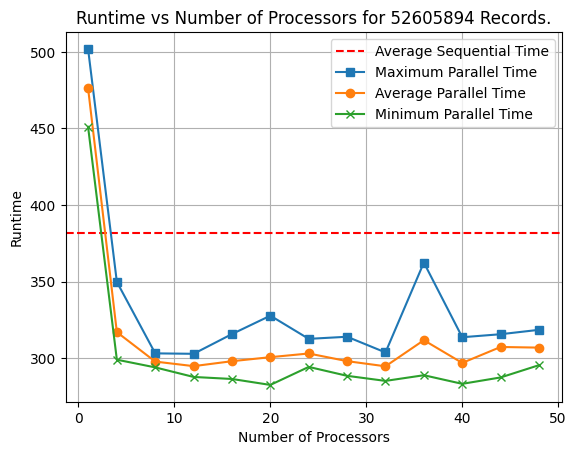

In [7]:
plt.plot(figsize=(10, 6))
plt.grid(True)

# Plot Title and Axis Labels
plt.title(f"Runtime vs Number of Processors for {total_records} Records.")
plt.xlabel("Number of Processors")
plt.ylabel("Runtime")

# Plot average sequential run time
plt.axhline(avg_sequential_time, color="r", linestyle="--")

# Plot parallel run times
plt.plot(max_run_times.keys(), max_run_times.values(), marker="s")
plt.plot(avg_run_times.keys(), avg_run_times.values(), marker="o")
plt.plot(min_run_times.keys(), min_run_times.values(), marker="x")

plt.legend(["Average Sequential Time", "Maximum Parallel Time", "Average Parallel Time", "Minimum Parallel Time"])

plt.savefig(data_csv_path.rstrip("csv") + "png", dpi=600)

plt.show()